In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, 3:5].values

In [4]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs

In [5]:
af = AffinityPropagation(preference=-50, random_state=5).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [8]:
labels

array([ 0,  1,  2,  1,  0,  1,  2,  4,  2,  1,  3,  4,  3,  1,  3,  1,  5,
        6,  9,  4,  5,  7, 11,  7, 13,  8,  9, 10,  9,  8, 11, 14, 11, 12,
       13,  8, 13, 14, 16, 14, 16, 12, 16, 15, 16, 15, 17, 18, 18, 18, 17,
       15, 17, 15, 18, 18, 20, 18, 20, 18, 19, 17, 20, 19, 20, 19, 20, 20,
       19, 20, 19, 23, 20, 19, 21, 22, 22, 21, 22, 23, 22, 22, 23, 23, 22,
       21, 24, 24, 24, 21, 27, 25, 26, 25, 25, 27, 26, 26, 25, 26, 25, 26,
       27, 27, 27, 25, 26, 26, 28, 26, 27, 27, 28, 26, 26, 26, 28, 29, 28,
       29, 29, 28, 29, 33, 31, 30, 31, 33, 32, 30, 32, 30, 31, 30, 32, 34,
       32, 30, 32, 30, 32, 33, 35, 34, 36, 33, 35, 37, 36, 34, 36, 34, 36,
       37, 36, 34, 38, 37, 38, 37, 35, 34, 38, 33, 39, 40, 39, 43, 39, 41,
       42, 40, 42, 43, 42, 43, 42, 41, 45, 46, 44, 46, 45, 46, 47, 48, 49,
       50, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])

In [6]:
n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)


Estimated number of clusters: 59


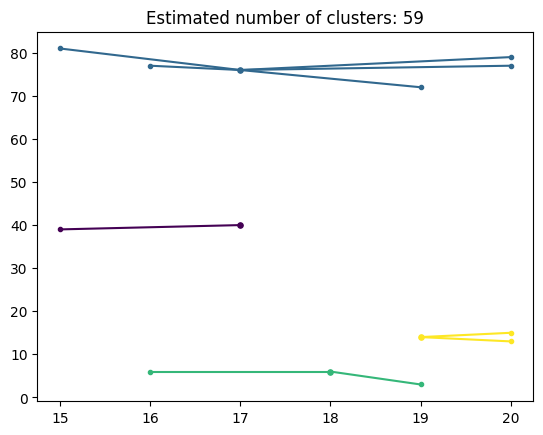

In [7]:
#Took this code from scikit Learn
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [9]:
supervised=dataset
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
supervised.to_csv("cluster.csv",index=False)

In [11]:
supervised.columns[3]

'Annual Income (k$)'

In [12]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

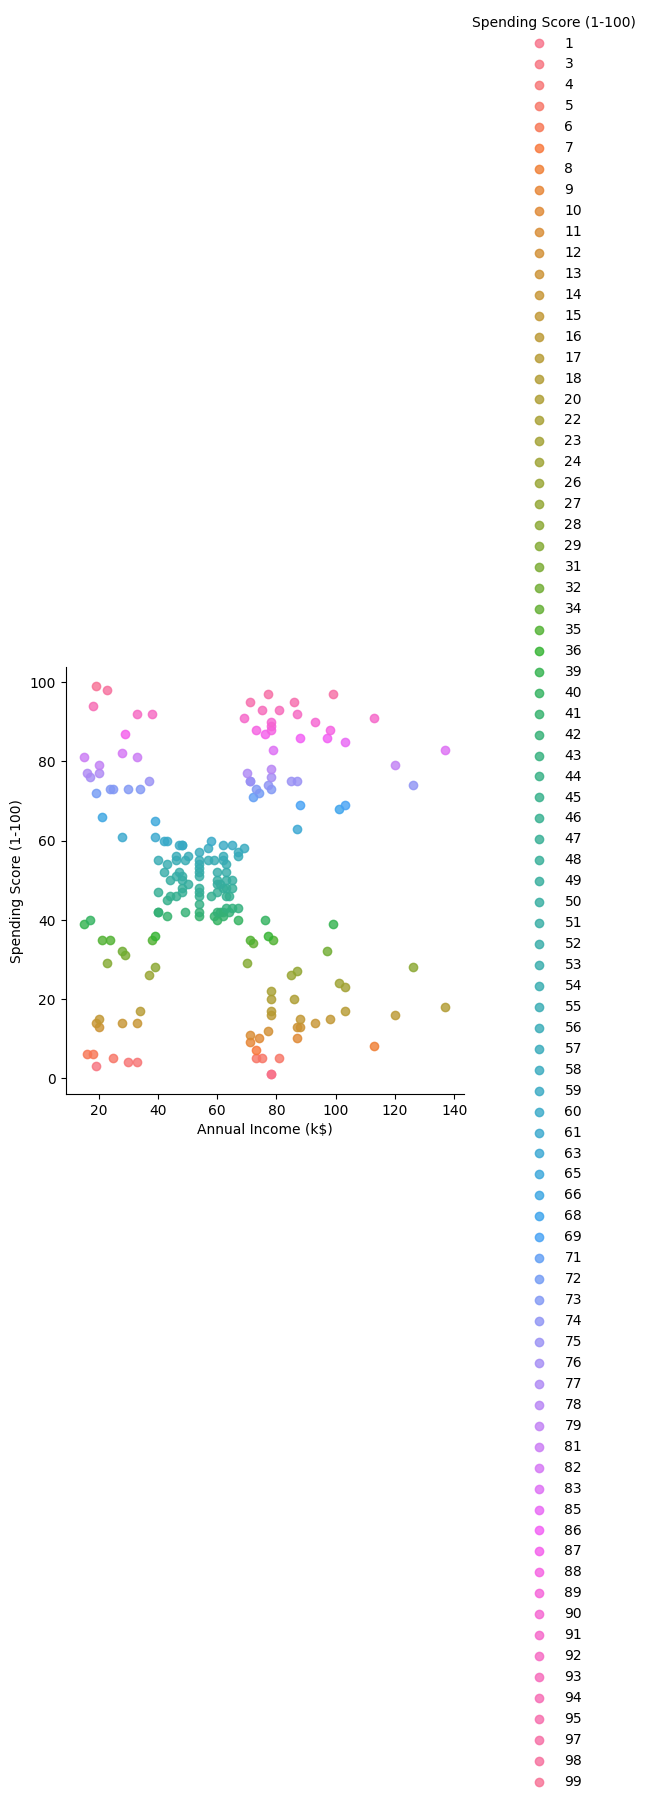

In [17]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[4],
                   fit_reg=False, legend=True, facet_kws={"legend_out": True})